# Lead Score Case Study

Business Objective : An education company named X Education sells online courses to industry professionals.Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. The objective is to build a model to identify the hot/potential leads and achieve lead conversion rate to 80%.

## Data Sourcing

In [206]:
import warnings
warnings.filterwarnings('ignore')

In [207]:
# Let's Import Pandas and NumPy
import pandas as pd, numpy as np

In [208]:
# Let's Import dataset
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [209]:
# Let's Check shape of dataset

leads.shape

(9240, 37)

In [210]:
# Let's Inspect the columns

leads.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [211]:
# Let's Check info of all the columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [212]:
# Let's describe the numerical columns of the dataframe

leads.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [213]:
# Let's Describe all columns of the dataset

leads.describe(include = 'all')

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240.000000,9240,9204,9240,9240,9240.000000,9103.000000,9240.000000,9103.000000,...,9240,6531,7820,5022,5022,5022.000000,5022.000000,9240,9240,9240
unique,9240,NaN,5,21,2,2,NaN,NaN,NaN,NaN,...,1,6,7,3,3,NaN,NaN,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,NaN,Landing Page Submission,Google,No,No,NaN,NaN,NaN,NaN,...,No,Select,Mumbai,02.Medium,02.Medium,NaN,NaN,No,No,Modified
freq,1,NaN,4886,2868,8506,9238,NaN,NaN,NaN,NaN,...,9240,4146,3222,3839,2788,NaN,NaN,9240,6352,3407
mean,NaN,617188.435606,NaN,NaN,NaN,NaN,0.385390,3.445238,487.698268,2.362820,...,NaN,NaN,NaN,NaN,NaN,14.306252,16.344883,NaN,NaN,NaN
std,NaN,23405.995698,NaN,NaN,NaN,NaN,0.486714,4.854853,548.021466,2.161418,...,NaN,NaN,NaN,NaN,NaN,1.386694,1.811395,NaN,NaN,NaN
min,NaN,579533.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,...,NaN,NaN,NaN,NaN,NaN,7.000000,11.000000,NaN,NaN,NaN
25%,NaN,596484.500000,NaN,NaN,NaN,NaN,0.000000,1.000000,12.000000,1.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,15.000000,NaN,NaN,NaN
50%,NaN,615479.000000,NaN,NaN,NaN,NaN,0.000000,3.000000,248.000000,2.000000,...,NaN,NaN,NaN,NaN,NaN,14.000000,16.000000,NaN,NaN,NaN
75%,NaN,637387.250000,NaN,NaN,NaN,NaN,1.000000,5.000000,936.000000,3.000000,...,NaN,NaN,NaN,NaN,NaN,15.000000,18.000000,NaN,NaN,NaN


In [214]:
# Let's Check no of unique values in each column

leads.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     19
How did you hear about X Education                 10
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [215]:
# There is no duplicated rows here as nunique of Prospect ID and Lead Number is 9240.

In [216]:
# Let's check through duplicated() function

leads.duplicated().sum()

0

In [217]:
# Let's Check for any null values present in the dataset

leads.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [218]:
# Let's check Length of the dataset i.e. no of rows

len(leads)

9240

## Data Cleaning

1. Removing columns with a single unique value across all leads.
2. Handling the "Select" variable, which is a common component of categorical variables.
3. Removing all columns having more than 40% of their values missing
4. Removing columns with a lot of imbalanced data
5. Using the imputation method for columns with less less % of missing values
6. Combining low-percentage categories into a single category.

In [219]:
# Let's Check the percentage of missing values

round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending = False)

Lead Quality                                     51.59
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Tags                                             36.29
Lead Profile                                     29.32
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
How did you hear about X Education               23.89
Specialization                                   15.56
City                                             15.37
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Receive More Updates About Our Courses            0.00
I agree to

In [220]:
# Let's Drop columns that have only one unique values for all the leads.

cols = []
for i in leads.columns:
    if leads[i].nunique() ==1:
        cols.append(i)
leads.drop(cols, axis =1,inplace = True)
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [221]:
# Let's Drop Prospect ID as these are merely shows the ID number of the Contacted People.
# Lead Number & Prospect ID have all unique values. Let's keep Lead Number for identification of the lead.

leads = leads.drop(['Prospect ID'], 1)
leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Interested in other courses,Low in Relevance,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Modified
1,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Ringing,NaN,Select,Select,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Ringing,Not Sure,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Will revert after reading the email,Might be,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


As can be seen,there are few columns with level called 'Select' which means that the customer had not selected the option for that particular column which is why it shows 'Select'. These values are as good as missing values and hence we will convert 'Select' values to Nan

In [222]:
# Let's Inspect all the columns with Select variable in the dataframe.

leads.isin(['Select']).any()

Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                    True
How did you hear about X Education                True
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

In [223]:
# Let's Consider Specialization column

leads['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [224]:
# Let's Consider `How did you hear about X Education` column

leads['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [225]:
# Let's Consider `Lead Profile` column

leads['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [226]:
# Let's Consider `City` column

leads['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [227]:
#leads.replace() will replace all the occurances of the given string to missing values.

leads.replace('Select', np.nan,inplace=True)

In [228]:
# Again Let's  inspect all the columns with Select variable in the dataframe.

leads.isin(['Select']).any()

Lead Number                                      False
Lead Origin                                      False
Lead Source                                      False
Do Not Email                                     False
Do Not Call                                      False
Converted                                        False
TotalVisits                                      False
Total Time Spent on Website                      False
Page Views Per Visit                             False
Last Activity                                    False
Country                                          False
Specialization                                   False
How did you hear about X Education               False
What is your current occupation                  False
What matters most to you in choosing a course    False
Search                                           False
Newspaper Article                                False
X Education Forums                               False
Newspaper 

In [229]:
# Let's Check the percentage of missing values

round(100*(leads.isnull().sum()/len(leads)), 2).sort_values(ascending = False)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
Page Views Per Visit                              1.48
TotalVisits                                       1.48
Last Activity                                     1.11
Lead Source                                       0.39
Through Recommendations                           0.00
A free cop

As we can see there are many columns with high percentage of null values, we will drop them as they are not useful

In [230]:
# Let's Drop all the columns with more than 40% missing values

for i in leads.columns:
    if(round(100*(leads[i].isnull().sum()/len(leads)), 2) >= 40):
        leads.drop(i, 1, inplace = True)

In [231]:
round(100*(leads.isnull().sum()/len(leads)), 2)

Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

In [232]:
# Let's Get the value counts of all the columns

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('___________________________________________________')

579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
___________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
___________________________________________________
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
WeLearn                 1
Pay per Click Ads       1
NC_EDM                  1
blog                    1
testone                 1
welearnblog_Home        1
youtub

In [233]:
# Let's Use drop to remove columns with high data imbalance 

leads.drop(['Do Not Call', 'What matters most to you in choosing a course','Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations'], axis = 1, inplace = True)

In [234]:
# Let's Check info again

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 16 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Number                             9240 non-null   int64  
 1   Lead Origin                             9240 non-null   object 
 2   Lead Source                             9204 non-null   object 
 3   Do Not Email                            9240 non-null   object 
 4   Converted                               9240 non-null   int64  
 5   TotalVisits                             9103 non-null   float64
 6   Total Time Spent on Website             9240 non-null   int64  
 7   Page Views Per Visit                    9103 non-null   float64
 8   Last Activity                           9137 non-null   object 
 9   Country                                 6779 non-null   object 
 10  Specialization                          5860 non-null   obje

In [235]:
# No of missing values left

leads.isnull().sum()

Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Country                                   2461
Specialization                            3380
What is your current occupation           2690
Tags                                      3353
City                                      3669
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### Lead Source

In [236]:
# Let's Check value counts

leads['Lead Source'].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [237]:
# Since Google has the most occurrences, we shall impute the missing data with the word "Google."
# Let's replace Nan Value with Google
leads['Lead Source'] = leads['Lead Source'].replace(np.nan,'Google')

#'Lead Source' is having same label name 'Google' but in different format i.e 'google', So converting google to Google
leads['Lead Source'] = leads['Lead Source'].replace('google','Google')

In [238]:
# Let's combine low frequency values to Others

leads['Lead Source'] = leads['Lead Source'].replace(['bing','Click2call','Press_Release', 'Social Media' , 'Live Chat',
                                                     'youtubechannel','testone', 'Pay per Click Ads', 'welearnblog_Home',
                                                     'WeLearn','blog','NC_EDM',] ,'Others')

In [239]:
# Let's Check value counts %

leads['Lead Source'].value_counts(normalize = True)*100

Google              31.482684
Direct Traffic      27.521645
Olark Chat          18.993506
Organic Search      12.489177
Reference            5.779221
Welingak Website     1.536797
Referral Sites       1.352814
Facebook             0.595238
Others               0.248918
Name: Lead Source, dtype: float64

#### Lead Origin

In [240]:
# Let's Check value counts %

leads['Lead Origin'].value_counts(normalize = True)*100

Landing Page Submission    52.878788
API                        38.744589
Lead Add Form               7.770563
Lead Import                 0.595238
Quick Add Form              0.010823
Name: Lead Origin, dtype: float64

#### Total Visits

In [241]:
# Let's Describe 'TotalVisits' column

leads['TotalVisits'].describe()

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [242]:
# Let's Impute missing values in 'TotalVisits' with median which is 3. 

leads['TotalVisits'].fillna(leads['TotalVisits'].median(),inplace=True)

In [243]:
leads['TotalVisits'].describe()

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

#### Page Views Per Visit

In [244]:
# Let's Describe 'Page Views Per Visit' column

leads['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

In [245]:
#Imputing missing values with mean/median which is 2. 

leads['Page Views Per Visit'].fillna(leads['Page Views Per Visit'].median(),inplace=True)

In [246]:
leads['Page Views Per Visit'].describe()

count    9240.000000
mean        2.357440
std         2.145781
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

#### Last Activity

In [247]:
# Let's Check value counts %

leads['Last Activity'].value_counts(normalize = True)*100

Email Opened                    37.616285
SMS Sent                        30.042684
Olark Chat Conversation         10.649010
Page Visited on Website          7.004487
Converted to Lead                4.684251
Email Bounced                    3.567911
Email Link Clicked               2.922185
Form Submitted on Website        1.269563
Unreachable                      1.017840
Unsubscribed                     0.667615
Had a Phone Conversation         0.328335
Approached upfront               0.098501
View in browser link Clicked     0.065667
Email Received                   0.021889
Email Marked Spam                0.021889
Visited Booth in Tradeshow       0.010945
Resubscribed to emails           0.010945
Name: Last Activity, dtype: float64

In [248]:
# Let's replace Nan Values with mode value "Email Opened"

leads['Last Activity'] = leads['Last Activity'].replace(np.nan,'Email Opened')

In [249]:
# Let's combine low frequency values

leads['Last Activity'] = leads['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                       'Had a Phone Conversation', 
                                                       'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [250]:
# Again Let's Check value counts %

leads['Last Activity'].value_counts(normalize = True)*100

Email Opened                 38.311688
SMS Sent                     29.707792
Olark Chat Conversation      10.530303
Page Visited on Website       6.926407
Converted to Lead             4.632035
Email Bounced                 3.528139
Email Link Clicked            2.889610
Others                        2.218615
Form Submitted on Website     1.255411
Name: Last Activity, dtype: float64

#### Country

In [251]:
leads['Country'].value_counts(normalize = True)*100

India                   95.766337
United States            1.017849
United Arab Emirates     0.781826
Singapore                0.354035
Saudi Arabia             0.309780
United Kingdom           0.221272
Australia                0.191769
Qatar                    0.147514
Hong Kong                0.103260
Bahrain                  0.103260
Oman                     0.088509
France                   0.088509
unknown                  0.073757
South Africa             0.059006
Nigeria                  0.059006
Germany                  0.059006
Kuwait                   0.059006
Canada                   0.059006
Sweden                   0.044254
China                    0.029503
Asia/Pacific Region      0.029503
Uganda                   0.029503
Bangladesh               0.029503
Italy                    0.029503
Belgium                  0.029503
Netherlands              0.029503
Ghana                    0.029503
Philippines              0.029503
Russia                   0.014751
Switzerland   

In [252]:
# Here, we can see that the Country column does not provide much information because 27% of the values are missing 
# and,96% of the values go under the category of "India," with the remaining values falling under other countries.
# So, it would be wiser to remove the country column.

# Let's Use drop to remove country column 
leads.drop('Country', axis = 1, inplace = True)

In [253]:
# Let's Recheck the number of null values for the remaining columns that need to be handled.

leads.isnull().sum().sort_values(ascending = False)

City                                      3669
Specialization                            3380
Tags                                      3353
What is your current occupation           2690
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### City

In [254]:
# Let's Check City Column
leads['City'].value_counts(normalize = True)*100

Mumbai                         57.835218
Thane & Outskirts              13.498474
Other Cities                   12.313768
Other Cities of Maharashtra     8.203195
Other Metro Cities              6.821038
Tier II Cities                  1.328307
Name: City, dtype: float64

In [3]:
# Here, we can see that there isn't much information available from the City column because 40% of the values are missing. 
# In addition, there are categories like Other Cities and Other Metro Cities that don't provide much information, 
# therefore it would be best to remove the "City" column.

# Let's Use drop to remove city column 
leads.drop('City', axis = 1, inplace = True)

NameError: name 'leads' is not defined

#### Specialization

In [256]:
# Let's Check value counts %

leads['Specialization'].value_counts(normalize = True)*100

Finance Management                   16.655290
Human Resource Management            14.470990
Marketing Management                 14.300341
Operations Management                 8.583618
Business Administration               6.877133
IT Projects Management                6.245734
Supply Chain Management               5.955631
Banking, Investment And Insurance     5.767918
Travel and Tourism                    3.464164
Media and Advertising                 3.464164
International Business                3.037543
Healthcare Management                 2.713311
Hospitality Management                1.945392
E-COMMERCE                            1.911263
Retail Management                     1.706485
Rural and Agribusiness                1.245734
E-Business                            0.972696
Services Excellence                   0.682594
Name: Specialization, dtype: float64

In [257]:
#For all missing values, we add a new category called "Not Specified" to the "Specialization" column.

leads.Specialization.fillna('Not Specified', inplace=True)

#### Tags

In [258]:
# Let's Check value counts %

leads['Tags'].value_counts(normalize = True)*100

Will revert after reading the email                  35.196195
Ringing                                              20.434856
Interested in other courses                           8.714116
Already a student                                     7.898760
Closed by Horizzon                                    6.081196
switched off                                          4.076779
Busy                                                  3.159504
Lost to EINS                                          2.972652
Not doing further education                           2.463054
Interested  in full time MBA                          1.987430
Graduation in progress                                1.885510
invalid number                                        1.409886
Diploma holder (Not Eligible)                         1.070155
wrong number given                                    0.798369
opp hangup                                            0.560557
number not provided                                   0

In [259]:
# The Tags column has about 36% of the entries missing, and its value is determined after contacting the lead.
# As a result, it is a score variable and is not used to calculate the lead score.
# So it would be best to remove the "Tags" column.

# Let's Use drop to remove 'Tags' column 
leads.drop('Tags', axis = 1, inplace = True)

In [260]:
# Let's Check columns left to be treated for missing values

leads.isnull().sum().sort_values(ascending = False)

What is your current occupation           2690
Lead Number                                  0
Lead Origin                                  0
Lead Source                                  0
Do Not Email                                 0
Converted                                    0
TotalVisits                                  0
Total Time Spent on Website                  0
Page Views Per Visit                         0
Last Activity                                0
Specialization                               0
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

#### What is your current occupation

In [261]:
# Let's Check value counts %

leads['What is your current occupation'].value_counts(normalize = True)*100

Unemployed              85.496183
Working Professional    10.778626
Student                  3.206107
Other                    0.244275
Housewife                0.152672
Businessman              0.122137
Name: What is your current occupation, dtype: float64

In [262]:
# Replace the NaN values for occupation with "Unknown" since imputing any other value will lead to bias.

leads['What is your current occupation'].fillna(('Unknown'), inplace=True)

In [263]:
# Again Let's Check value counts %

leads.isnull().sum().sort_values(ascending = False)

Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [264]:
# After treating missing values, counting the number of unique values in each column

leads.nunique()

Lead Number                               9240
Lead Origin                                  5
Lead Source                                  9
Do Not Email                                 2
Converted                                    2
TotalVisits                                 41
Total Time Spent on Website               1731
Page Views Per Visit                       114
Last Activity                                9
Specialization                              19
What is your current occupation              7
A free copy of Mastering The Interview       2
Last Notable Activity                       16
dtype: int64

In [265]:
# Let's Get the value counts for each column.

for column in leads:
    print(leads[column].astype('category').value_counts())
    print('_'*70)

579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
______________________________________________________________________
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64
______________________________________________________________________
Google              2909
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
Others                23
Name: Lead Source, dtype: int64
______________________________________________________________________
No     8506
Yes     734
Name: Do Not Email, dtype: int64
______________________________________________________________________
0    5679
1    3561
Name: Conver

#### Last Notable Activity

In [266]:
# Let's club lower frequency values

leads['Last Notable Activity'] = leads['Last Notable Activity'].replace(['Had a Phone Conversation',
                                                                       'Email Marked Spam',
                                                                         'Unreachable',
                                                                         'Unsubscribed',
                                                                         'Email Bounced',                                                                    
                                                                       'Resubscribed to emails',
                                                                       'View in browser link Clicked',
                                                                       'Approached upfront', 
                                                                       'Form Submitted on Website', 
                                                                       'Email Received'],'Others')

In [267]:
# Let's Check value counts %

leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified                   36.872294
Email Opened               30.595238
SMS Sent                   23.506494
Page Visited on Website     3.441558
Olark Chat Conversation     1.980519
Email Link Clicked          1.872294
Others                      1.731602
Name: Last Notable Activity, dtype: float64

In [268]:
#Let's Check for any duplicates in the data.

leads.duplicated().sum()

0

# EDA (Exploratory Data Analysis)

In [269]:
# Let's Display the data types on different columns

leads.dtypes

Lead Number                                 int64
Lead Origin                                object
Lead Source                                object
Do Not Email                               object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Specialization                             object
What is your current occupation            object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

In [270]:
# Categorical columns

cat_col = ['Lead Origin', 'Lead Source' , 'Do Not Email' , 'Last Activity' , 'Specialization' , 'What is your current occupation',
           'A free copy of Mastering The Interview','Last Notable Activity']

In [271]:
# Continuous columns

con_col = ['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']

## Univariate Analysis

In [272]:
# Let's Import required libraries

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

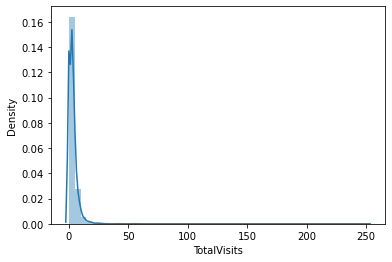

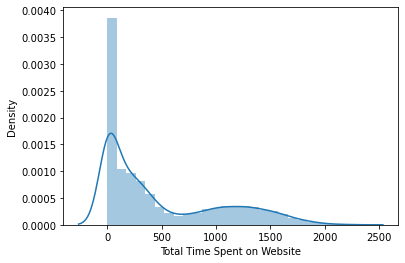

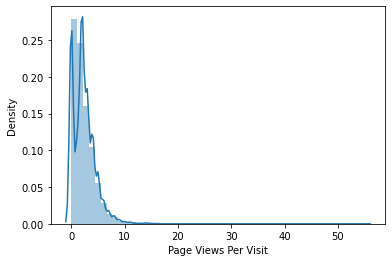

In [273]:
#For continuous columns

for i in con_col:
    sns.distplot(leads[i])
    plt.show()

#### Observation :

Univariate Analysis - Numerical values:

-- The max probability for TotalVisits is found to be around 15-20 visits. It increases initially but decreases further.

-- The max probability for PageViewsPerVisit is found to be around to be 3-5 pages.

-- The probability of time spent is found to be high for time between 0-300 seconds and decreases further.

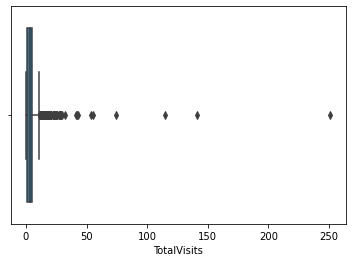

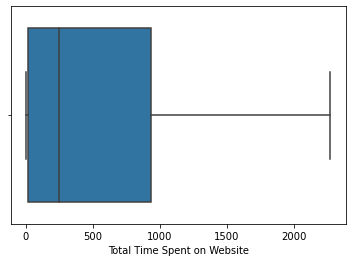

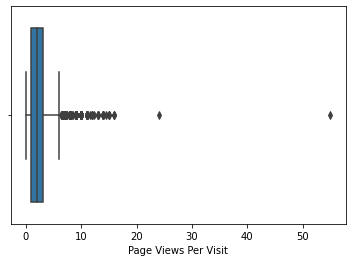

In [274]:
#For continuous columns

for i in con_col:
    sns.boxplot(leads[i])
    plt.show()

#####  'TotalVisits' and 'Page Views per Visit' columns have outliers.

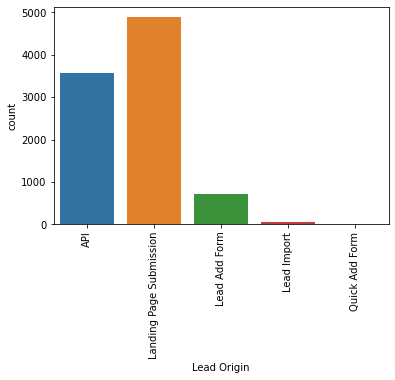

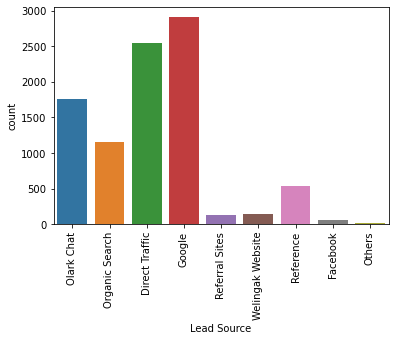

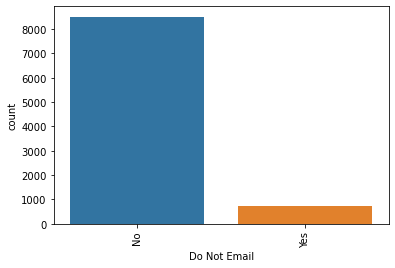

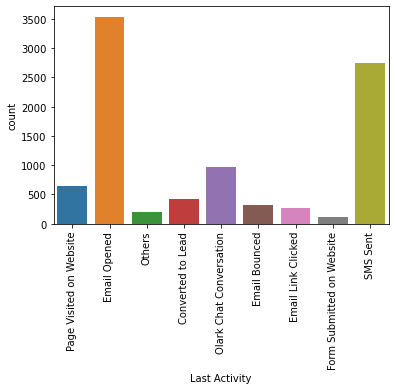

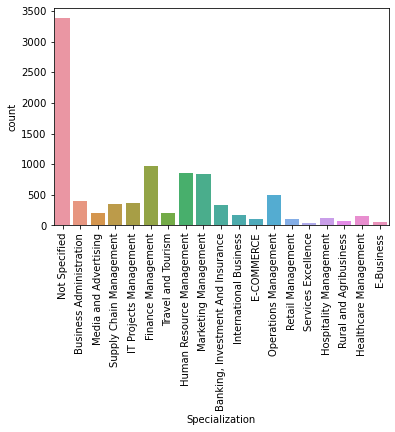

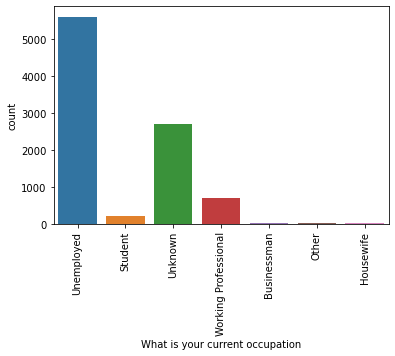

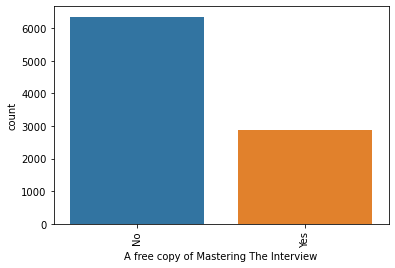

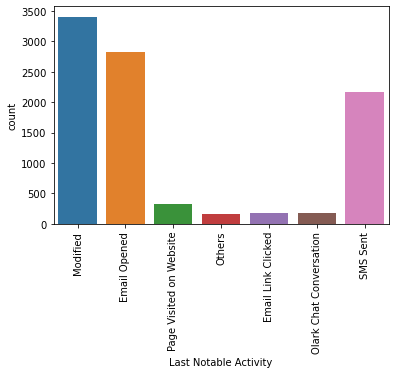

In [275]:
# For Categorical columns

for i in cat_col:
    sns.countplot(leads[i])
    plt.xticks(rotation = 90)
    plt.show()

##### Observations

-- Max leads source is from Google and Direct Traffic.

-- Maximum leads generated are unemployed

-- People usually do not subscribe for a free copy of mastering the interview.


## Bivariate Analysis

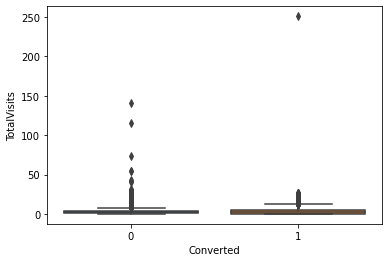

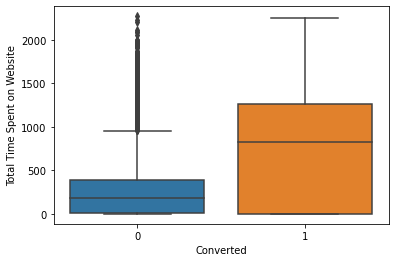

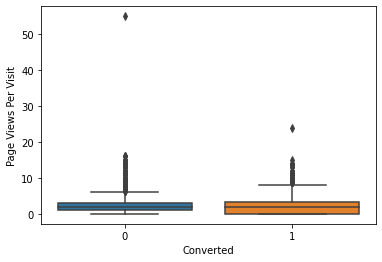

In [276]:
#For continuous columns

for i in con_col:
    sns.boxplot(x= 'Converted' , y = leads[i] , data = leads)
    plt.show()

Observation :

Bi-variate Analysis - continuous columns:

The mean of time spend on website is found to be higher in case of Converted people rather than non-converted people.

The average page views for both converted and non converted is found to be the same.

The average total visits for both converted and non converted people is found to be the same.

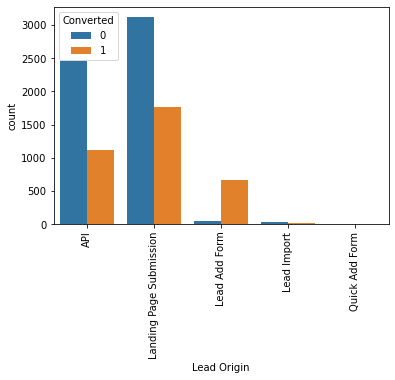

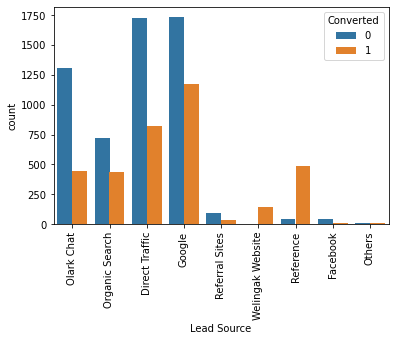

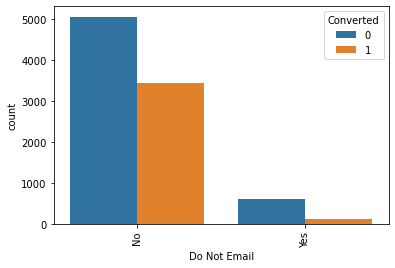

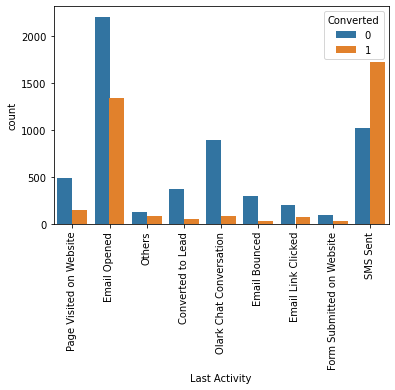

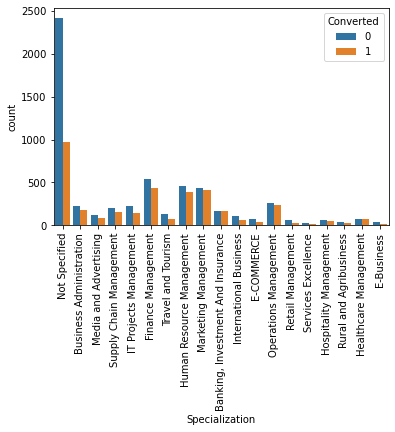

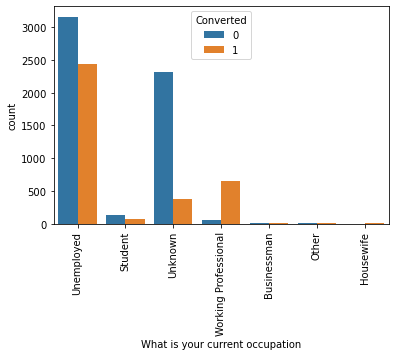

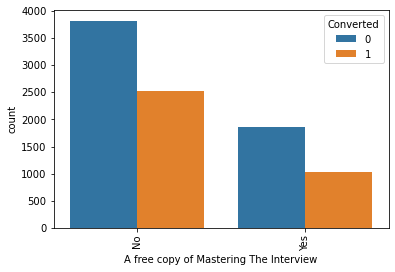

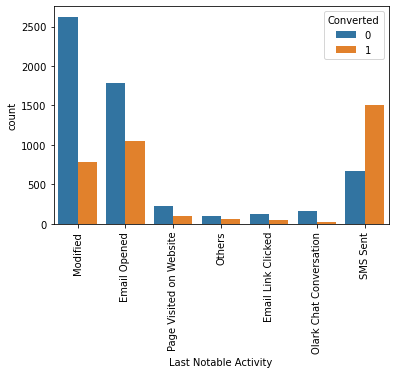

In [277]:
# For Categorical columns with hue as target column

for i in cat_col:
    sns.countplot(leads[i] , hue = 'Converted' , data = leads)
    plt.xticks(rotation = 90)
    plt.show()

##### Observations

-- if Lead source is Add Form, the ratio of lead conversion is very high.

-- We need to target people via Emails and SMS as it is found that the probability of response in case Converted leads is found to be higher.

-- Google is found to be the important source for Lead Conversion

-- It is clearly visible from the graph that we need to target the Unemployed and Working Professional to get a higher conversion rate. The ratio of conversion rate is higher than not converted people for working professionals.

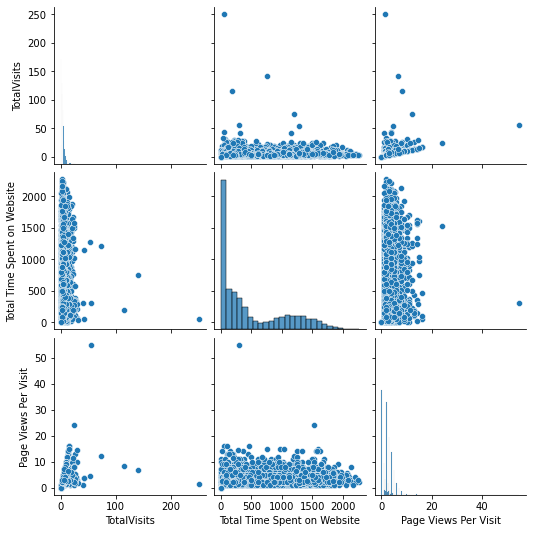

In [278]:
# For continuous columns

sns.pairplot(leads[con_col])

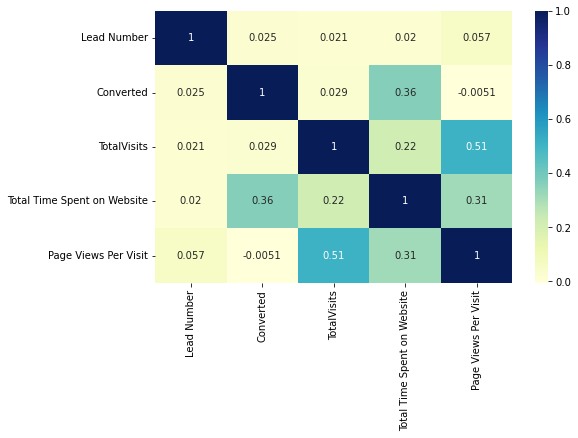

In [279]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (8,5))
sns.heatmap(leads.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [280]:
# Different percentile values of numerical columns

numeric = leads[con_col]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.438636,487.698268,2.357440
std,4.819024,548.021466,2.145781
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,251.000000,2272.000000,55.000000


## Outliers Treatment

In [281]:
# Outlier Treatment: capping the outliers to 99% value for analysis

req_cols=['TotalVisits','Page Views Per Visit'] 
for col in req_cols:
    percentiles = leads[col].quantile(0.99)  ## capping higher range outliers
    leads[col][leads[col] >= percentiles] = percentiles

In [282]:
numeric = leads[con_col]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000
mean,3.327814,487.698268,2.329050
std,3.228466,548.021466,1.971347
min,0.000000,0.000000,0.000000
25%,1.000000,12.000000,1.000000
50%,3.000000,248.000000,2.000000
75%,5.000000,936.000000,3.000000
90%,7.000000,1380.000000,5.000000
99%,17.000000,1840.610000,9.000000
max,17.000000,2272.000000,9.000000


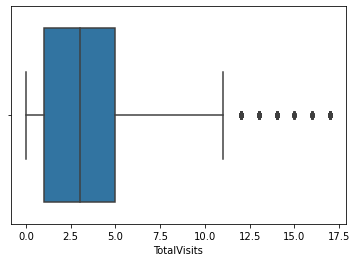

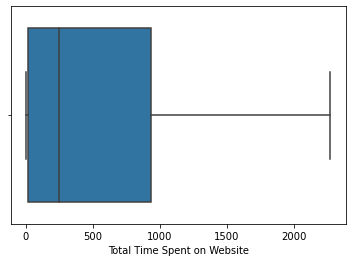

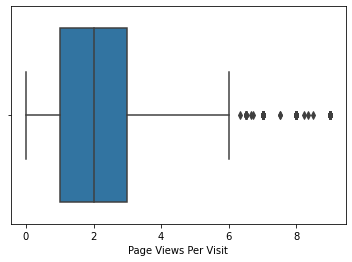

In [283]:
# Again Let's plot boxplots For continuous columns

for i in con_col:
    sns.boxplot(leads[i])
    plt.show()

# Data Preparation

Following steps will be done as part of data preparation:

1. Converting binary variable (Yes/No) to 1/0.
2. Creating dummies for categorical columns
3. Performing train-test split
4. Performing Scaling

In [284]:
# Converting binary variable (Yes/No) to 1/0.

varlist =['A free copy of Mastering The Interview' , 'Do Not Email']
def binary_map(x):
  return x.map({'Yes' : 1, "No": 0})

leads[varlist] = leads[varlist].apply(binary_map)

In [285]:
# Checking head of dataset

leads.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,Not Specified,Unemployed,0,Modified
1,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,Not Specified,Unemployed,0,Email Opened
2,660727,Landing Page Submission,Direct Traffic,0,1,2.0,1532,2.0,Email Opened,Business Administration,Student,1,Email Opened
3,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Others,Media and Advertising,Unemployed,0,Modified
4,660681,Landing Page Submission,Google,0,1,2.0,1428,1.0,Converted to Lead,Not Specified,Unemployed,0,Modified


###  Creating Dummies

In [286]:
#getting a list of categorical columns foy creating dummy

cat_cols= leads.select_dtypes(include=['object']).columns
cat_cols

Index(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization',
       'What is your current occupation', 'Last Notable Activity'],
      dtype='object')

In [287]:
dummy1 = pd.get_dummies(leads['Lead Origin'], drop_first=True)
leads = pd.concat([leads,dummy1],1)

In [288]:
dummy2 = pd.get_dummies(leads['Lead Source'], prefix  = 'Lead Source')
dummy2 = dummy2.drop(['Lead Source_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy2], axis = 1)

dummy3 = pd.get_dummies(leads['Last Activity'], prefix  = 'Last Activity')
dummy3 = dummy3.drop(['Last Activity_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy3], axis = 1)

dummy4 = pd.get_dummies(leads['Specialization'], prefix  = 'Specialization')
dummy4 = dummy4.drop(['Specialization_Not Specified'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy4], axis = 1)

dummy5 = pd.get_dummies(leads['What is your current occupation'], prefix  = 'What is your current occupation')
dummy5 = dummy5.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy5], axis = 1)

dummy6 = pd.get_dummies(leads['Last Notable Activity'], prefix  = 'Last Notable Activity')
dummy6 = dummy6.drop(['Last Notable Activity_Others'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads, dummy6], axis = 1)

In [289]:
#Checking if the dummy-variables are added into the dataframe correctly.

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 63 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Lead Origin                                           9240 non-null   object 
 2   Lead Source                                           9240 non-null   object 
 3   Do Not Email                                          9240 non-null   int64  
 4   Converted                                             9240 non-null   int64  
 5   TotalVisits                                           9240 non-null   float64
 6   Total Time Spent on Website                           9240 non-null   int64  
 7   Page Views Per Visit                                  9240 non-null   float64
 8   Last Activity                                         9240

In [290]:
#dropping the original columns after dummy variable creation

leads.drop(cat_cols,1,inplace = True)

In [291]:
# Checking remaining columns

leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 57 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Lead Number                                           9240 non-null   int64  
 1   Do Not Email                                          9240 non-null   int64  
 2   Converted                                             9240 non-null   int64  
 3   TotalVisits                                           9240 non-null   float64
 4   Total Time Spent on Website                           9240 non-null   int64  
 5   Page Views Per Visit                                  9240 non-null   float64
 6   A free copy of Mastering The Interview                9240 non-null   int64  
 7   Landing Page Submission                               9240 non-null   uint8  
 8   Lead Add Form                                         9240

In [292]:
# Let's Inspect the dataset after dummy variable creation

leads.head()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,660737,0,0,0.0,0,0.0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,660728,0,0,5.0,674,2.5,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,660727,0,1,2.0,1532,2.0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
3,660719,0,0,1.0,305,1.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
4,660681,0,1,2.0,1428,1.0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0


## Train Test Split

In [293]:
# Let's import library for splitting dataset
from sklearn.model_selection import train_test_split

In [294]:
# Let's Putt feature variable to X
X = leads.drop(['Lead Number','Converted'], axis=1)   #Lead Number is not predictor

X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Direct Traffic,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [295]:
# Let's Put response variable to y
y = leads['Converted']

y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [296]:
# Let's Split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [297]:
#Let's import library for feature scaling
from sklearn.preprocessing import StandardScaler

In [298]:
#scaling of features
scaler = StandardScaler()

num_cols= ['TotalVisits','Total Time Spent on Website' , 'Page Views Per Visit']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

#checking X-train dataset after scaling
X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Direct Traffic,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
1871,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
6795,0,0.205373,0.005716,-0.503379,1,1,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
3516,0,0.512365,-0.691418,0.092260,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
8105,0,0.512365,1.365219,1.364995,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3934,0,-1.022595,-0.885371,-1.180474,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [299]:
#Let's Check the mean and standard deviation
X_train.describe()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,Quick Add Form,Lead Source_Direct Traffic,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
count,6468.000000,6.468000e+03,6.468000e+03,6.468000e+03,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,...,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,0.078386,-1.346411e-16,-1.609377e-16,-4.136731e-17,0.311843,0.528139,0.079468,0.005102,0.000155,0.271490,...,0.001237,0.021027,0.605133,0.077613,0.018398,0.305349,0.367811,0.018553,0.035869,0.237477
std,0.268799,1.000077e+00,1.000077e+00,1.000077e+00,0.463282,0.499246,0.270489,0.071252,0.012434,0.444763,...,0.035150,0.143484,0.488860,0.267582,0.134397,0.460591,0.482247,0.134950,0.185978,0.425570
min,0.000000,-1.022595e+00,-8.853708e-01,-1.180474e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,-7.156027e-01,-8.634138e-01,-6.713803e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,-1.016187e-01,-4.352528e-01,-1.622866e-01,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,5.123653e-01,8.098906e-01,3.468071e-01,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,4.196269e+00,3.271816e+00,3.401369e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


##### Conversion Rate before modelling

In [300]:
### Checking the Conversion Rate
conv = (sum(leads['Converted'])/len(leads['Converted'].index))*100
conv

38.53896103896104

##### Observation : As we can see that conversion rate before modelling is found to be around 38.53%

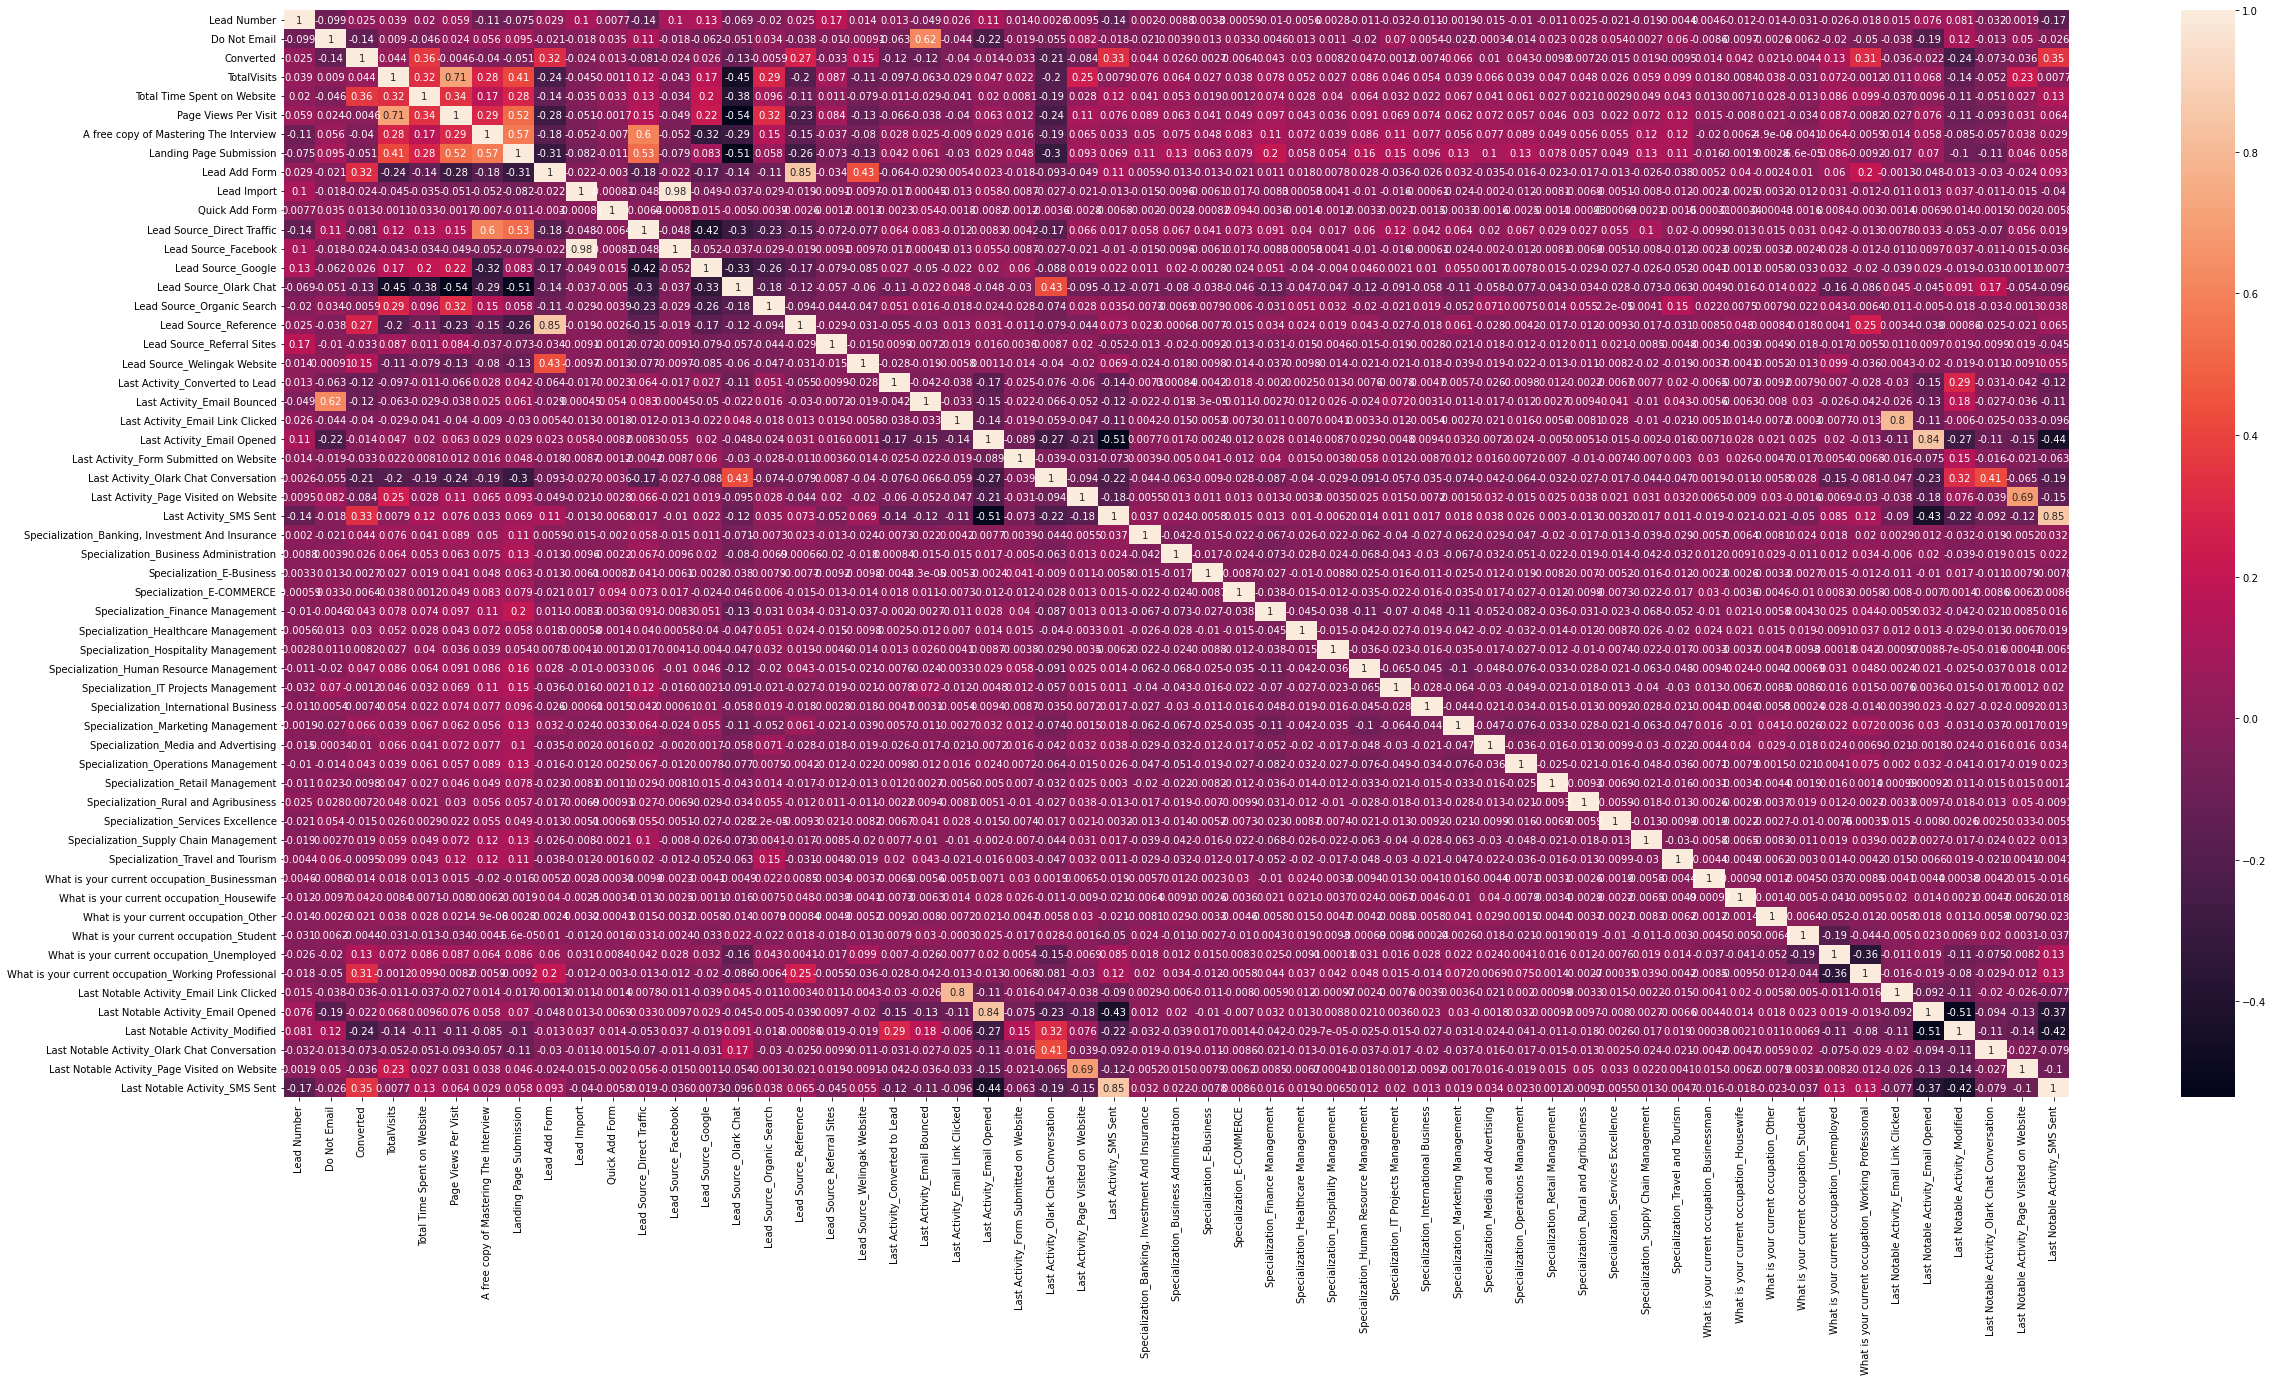

In [301]:
# Let's see the correlation matrix 
plt.figure(figsize = (40,20))        # Size of the figure
sns.heatmap(leads.corr(),annot = True)
plt.show()

In [302]:
leads.corr()

,Lead Number,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Landing Page Submission,Lead Add Form,Lead Import,...,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
Lead Number,1.000000,-0.098529,0.025157,0.038873,0.020329,0.059445,-0.109696,-0.075012,0.029158,0.104726,...,-0.013992,-0.031019,-0.025559,-0.017605,0.014802,0.076414,0.080591,-0.031622,0.001868,-0.169987
Do Not Email,-0.098529,1.000000,-0.135580,0.008974,-0.046374,0.023875,0.055762,0.095304,-0.020983,-0.017529,...,-0.002609,0.006225,-0.019533,-0.049841,-0.037624,-0.188089,0.117259,-0.013032,0.049921,-0.025990
Converted,0.025157,-0.135580,1.000000,0.043716,0.362483,-0.004603,-0.039820,-0.051236,0.321702,-0.023695,...,0.020505,-0.004375,0.128710,0.313837,-0.035555,-0.021955,-0.244294,-0.072660,-0.036051,0.351845
TotalVisits,0.038873,0.008974,0.043716,1.000000,0.324556,0.706203,0.280920,0.408685,-0.237099,-0.044902,...,0.037699,-0.030557,0.071988,-0.001191,-0.010564,0.067677,-0.143270,-0.052450,0.228911,0.007747
Total Time Spent on Website,0.020329,-0.046374,0.362483,0.324556,1.000000,0.336715,0.168298,0.276009,-0.139681,-0.034926,...,0.028115,-0.012518,0.086366,0.099241,-0.037113,0.009585,-0.106857,-0.051402,0.026644,0.125076
Page Views Per Visit,0.059445,0.023875,-0.004603,0.706203,0.336715,1.000000,0.292589,0.520359,-0.279637,-0.051459,...,0.021214,-0.033627,0.086953,-0.008192,-0.027072,0.075865,-0.111028,-0.093252,0.030976,0.064299
A free copy of Mastering The Interview,-0.109696,0.055762,-0.039820,0.280920,0.168298,0.292589,1.000000,0.569633,-0.180893,-0.052178,...,-0.000005,-0.004130,0.064362,-0.005856,0.013656,0.058474,-0.084626,-0.057305,0.037921,0.028704
Landing Page Submission,-0.075012,0.095304,-0.051236,0.408685,0.276009,0.520359,0.569633,1.000000,-0.307485,-0.081974,...,0.002813,-0.000066,0.085987,-0.009242,-0.016764,0.070159,-0.101822,-0.114790,0.046200,0.057507
Lead Add Form,0.029158,-0.020983,0.321702,-0.237099,-0.139681,-0.279637,-0.180893,-0.307485,1.000000,-0.022461,...,-0.002366,0.009987,0.060272,0.196526,-0.001321,-0.047965,-0.013192,-0.029654,-0.023752,0.092690
Lead Import,0.104726,-0.017529,-0.023695,-0.044902,-0.034926,-0.051459,-0.052178,-0.081974,-0.022461,1.000000,...,-0.003223,-0.011801,0.030714,-0.011664,-0.010689,0.012740,0.037095,-0.011000,-0.014609,-0.039579


In [303]:
# We'll check co-relations during model building using VIFs.

# Model Building

In [304]:
# Let's import necessary library
import statsmodels.api as sm

#### Model 1

In [305]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6412
Model Family:                Binomial   Df Model:                           55
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2524.4
Date:                Tue, 13 Sep 2022   Deviance:                       5048.9
Time:                        18:00:27   Pearson chi2:                 6.95e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.1147      0.730     -0.157      0.875      -1.545       1.315
Do Not Email                                            -1.2476      0.210     -5.947      0.000      -1.659      -0.836
TotalVisits                                              0.2789      0.051      5.445      0.000       0.178       0.379
Total Time Spent on Website                              1.0729      0.041     26.126      0.000       0.992       1.153
Page Views Per Visit                                    -0.2639      0.057     -4.608      0.000      -0.376      -0.152
A free copy of Mastering The Interview                  -0.2380      0.111     -2.150      0.032      -0.455      -0.021
Landing Page Submission                                 -0.8483      0.141     -6.027      0.000      -1.124      -0.572
Lead Add Form                                            2.5186      0.516      4.880      0.000       1.507       3.530
Lead Import                                              0.3342      1.882      0.178      0.859      -3.354       4.023
Quick Add Form                                          21.5135   4.82e+04      0.000      1.000   -9.44e+04    9.45e+04
Lead Source_Direct Traffic                              -0.6246      0.669     -0.933      0.351      -1.936       0.687
Lead Source_Facebook                                    -1.2449      1.993     -0.625      0.532      -5.150       2.661
Lead Source_Google                                      -0.3968      0.664     -0.597      0.550      -1.699       0.905
Lead Source_Olark Chat                                   0.5799      0.675      0.860      0.390      -0.742       1.902
Lead Source_Organic Search                              -0.5102      0.673     -0.758      0.448      -1.829       0.809
Lead Source_Reference                                   -0.0835      0.800     -0.104      0.917      -1.652       1.485
Lead Source_Referral Sites                              -0.5066      0.734     -0.690      0.490      -1.945       0.931
Lead Source_Welingak Website                             2.2488      1.059      2.123      0.034       0.173       4.325
Last Activity_Converted to Lead                         -0.8786      0.385     -2.280      0.023      -1.634      -0.123
Last Activity_Email Bounced                             -1.1117      0.413     -2.692      0.007      -1.921      -0.302
Last Activity_Email Link Clicked                        -0.4006      0.502     -0.798      0.425      -1.385       0.584
Last Activity_Email Opened                               0.0668      0.344      0.194      0.846      -0.607       0.740
Last Activity_Form Submitted on Website                 -0

### Feature Selection Using RFE

In [306]:
#Let's Import Logistic Regression module from SkLearn

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() 

In [307]:
# running RFE with 15 variables as output

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             
rfe = rfe.fit(X_train, y_train)

In [308]:
#List of all columns on priority ranking

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 34),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 35),
 ('A free copy of Mastering The Interview', False, 37),
 ('Landing Page Submission', False, 6),
 ('Lead Add Form', True, 1),
 ('Lead Import', False, 33),
 ('Quick Add Form', False, 38),
 ('Lead Source_Direct Traffic', False, 25),
 ('Lead Source_Facebook', False, 24),
 ('Lead Source_Google', False, 28),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 26),
 ('Lead Source_Reference', False, 39),
 ('Lead Source_Referral Sites', False, 27),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Converted to Lead', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 22),
 ('Last Activity_Email Opened', False, 41),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', True, 1),
 (

In [309]:
rfe.support_

array([ True, False,  True, False, False, False,  True, False, False,
       False, False, False,  True, False, False, False,  True,  True,
        True, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True,  True,  True,  True, False, False,
       False])

In [310]:
# Columns selected using RFE
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Housewife',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [311]:
X_train.columns[~rfe.support_]     #these columns are not included in the model.

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Landing Page Submission',
       'Lead Import', 'Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_SMS Sent',
       'Specialization_Banking, Investment And Insurance',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
       'Specialization_IT Projects Management',
       'Specialization_International Business',
       'Specialization_Marketing Management',
       'S

#### Model 2  -- Assessing the model that has already been generated through RFE using Statsmodel

In [312]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
print(res.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2693.3
Date:                Tue, 13 Sep 2022   Deviance:                       5386.6
Time:                        18:00:37   Pearson chi2:                 7.39e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [313]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [314]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Last Notable Activity_Modified,1.90
6,Last Activity_Email Bounced,1.84
0,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.62
2,Lead Add Form,1.42
4,Lead Source_Welingak Website,1.24
5,Last Activity_Converted to Lead,1.24
1,Total Time Spent on Website,1.20
11,What is your current occupation_Working Profes...,1.14


#### Observations:

-- VIF values of all the variables are within limit.

-- Some variables have high p-values.

-- What is your current occupation_Housewife has highest p-value of 0.999. Hence needs to be dropped first.

In [315]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]  

1871    0.248751
6795    0.227076
3516    0.290169
8105    0.818642
3934    0.224958
4844    0.992278
3297    0.116700
8071    0.991771
987     0.121292
7423    0.897446
dtype: float64

In [316]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

In [317]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Id
0,0,0.248751,1871
1,0,0.227076,6795
2,0,0.290169,3516
3,0,0.818642,8105
4,0,0.224958,3934


In [318]:
#Mapping the prediction conversion Rate according to the probability cut off (0.5).
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Id,predicted
0,0,0.248751,1871,0
1,0,0.227076,6795,0
2,0,0.290169,3516,0
3,0,0.818642,8105,1
4,0,0.224958,3934,0


In [319]:
#Importing the required libraries for metric calculation

from sklearn import metrics

In [320]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3557  445]
 [ 730 1736]]


In [321]:
# Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8183364254792826


##### Model Accuracy after building 2nd model is 81.8%.

#### Model 3

In [322]:
# Dropping 'What is your current occupation_Housewife' variable as it has very high p value.

col = col.drop('What is your current occupation_Housewife',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [323]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.1
Date:                Tue, 13 Sep 2022   Deviance:                       5400.1
Time:                        18:00:39   Pearson chi2:                 7.42e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0258      0.066      0.394      0.694      -0.103       0.154
Do Not Email                                            -1.2308      0.194     -6.337      0.000      -1.611      -0.850
Total Time Spent on Website                              1.0856      0.039     27.646      0.000       1.009       1.163
Lead Add Form                                            3.6469      0.190     19.217      0.000       3.275       4.019
Lead Source_Olark Chat                                   1.0813      0.101     10.672      0.000       0.883       1.280
Lead Source_Welingak Website                             1.9637      0.743      2.644      0.008       0.508       3.419
Last Activity_Converted to Lead                         -1.2842      0.226     -5.679      0.000      -1.727      -0.841
Last Activity_Email Bounced                             -1.2963      0.345     -3.761      0.000      -1.972      -0.621
Last Activity_Olark Chat Conversation                   -1.7761      0.170    -10.440      0.000      -2.110      -1.443
Last Activity_Page Visited on Website                   -1.2480      0.148     -8.435      0.000      -1.538      -0.958
What is your current occupation_Student                  0.3618      0.235      1.541      0.123      -0.098       0.822
What is your current occupation_Working Professional     2.8025      0.189     14.828      0.000       2.432       3.173
Last Notable Activity_Email Link Clicked                -1.7948      0.268     -6.695      0.000      -2.320      -1.269
Last Notable Activity_Email Opened                      -1.2493      0.084    -14.794      0.000      -1.415      -1.084
Last Notable Activity_Modified                          -1.3789      0.092    -14.990      0.000      -1.559      -1.199
========================================================================================================================
"""

In [324]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Last Notable Activity_Modified,1.90
6,Last Activity_Email Bounced,1.84
0,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.62
2,Lead Add Form,1.42
4,Lead Source_Welingak Website,1.24
5,Last Activity_Converted to Lead,1.24
1,Total Time Spent on Website,1.20
10,What is your current occupation_Working Profes...,1.14


#### Model 4

In [325]:
# Dropping 'What is your current occupation_Student' variable as it has very high p value(0.123).

col = col.drop('What is your current occupation_Student',1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Add Form',
       'Lead Source_Olark Chat', 'Lead Source_Welingak Website',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Email Link Clicked',
       'Last Notable Activity_Email Opened', 'Last Notable Activity_Modified'],
      dtype='object')

In [326]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2701.2
Date:                Tue, 13 Sep 2022   Deviance:                       5402.4
Time:                        18:00:40   Pearson chi2:                 7.43e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                    0.0293      0.066      0.448      0.654      -0.099       0.158
Do Not Email                                            -1.2318      0.194     -6.338      0.000      -1.613      -0.851
Total Time Spent on Website                              1.0855      0.039     27.649      0.000       1.009       1.162
Lead Add Form                                            3.6559      0.190     19.282      0.000       3.284       4.028
Lead Source_Olark Chat                                   1.0853      0.101     10.712      0.000       0.887       1.284
Lead Source_Welingak Website                             1.9487      0.743      2.624      0.009       0.493       3.404
Last Activity_Converted to Lead                         -1.2835      0.226     -5.675      0.000      -1.727      -0.840
Last Activity_Email Bounced                             -1.2920      0.345     -3.744      0.000      -1.968      -0.616
Last Activity_Olark Chat Conversation                   -1.7724      0.170    -10.417      0.000      -2.106      -1.439
Last Activity_Page Visited on Website                   -1.2440      0.148     -8.418      0.000      -1.534      -0.954
What is your current occupation_Working Professional     2.7947      0.189     14.793      0.000       2.424       3.165
Last Notable Activity_Email Link Clicked                -1.8000      0.268     -6.716      0.000      -2.325      -1.275
Last Notable Activity_Email Opened                      -1.2423      0.084    -14.745      0.000      -1.407      -1.077
Last Notable Activity_Modified                          -1.3775      0.092    -14.980      0.000      -1.558      -1.197
========================================================================================================================
"""

In [327]:
# Checking VIFs

vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Last Notable Activity_Modified,1.89
6,Last Activity_Email Bounced,1.84
0,Do Not Email,1.82
3,Lead Source_Olark Chat,1.66
7,Last Activity_Olark Chat Conversation,1.62
2,Lead Add Form,1.41
5,Last Activity_Converted to Lead,1.24
4,Lead Source_Welingak Website,1.23
1,Total Time Spent on Website,1.20
9,What is your current occupation_Working Profes...,1.14


#### After multiple re-runs and improving the model we can say that, all the selected features have a P-value < 5%. and VIF value < 5

In [328]:
# Getting the predicted values on the train set
# X_train_sm contains all the predictor variable. 
# res contains the Logistic Regression model result
# y_train_Pred will provide us the Predicted Y Values for the given feature variables.

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.251854
6795    0.230269
3516    0.293546
8105    0.819239
3934    0.227239
4844    0.992202
3297    0.118658
8071    0.991987
987     0.121948
7423    0.897759
dtype: float64

In [329]:
#Reshaping the predicted probabilities so that it returns an array of Conversion_Probabilities.
y_train_pred = y_train_pred.values.reshape(-1)

In [330]:
#Creating a data frame with the actual Converted score and Probability of conversion
#The dataframe is stored in the variable y_train_pred_final.

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final['Lead_Id'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Id
0,0,0.251854,1871
1,0,0.230269,6795
2,0,0.293546,3516
3,0,0.819239,8105
4,0,0.227239,3934


In [331]:
#Mapping the prediction conversion Rate according to the probability cut off.
y_train_pred_final['predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Id,predicted
0,0,0.251854,1871,0
1,0,0.230269,6795,0
2,0,0.293546,3516,0
3,0,0.819239,8105,1
4,0,0.227239,3934,0


In [332]:
# Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3554  448]
 [ 731 1735]]


In [333]:
# checkig the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.8177179962894249


In [334]:
#Calculation of Final Model characteristics.

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [335]:
#Let's check the sensitivity of our logistic regression model

TP / float(TP+FN)

0.7035685320356854

In [336]:
#calculating specificity

TN / float(TN+FP)

0.888055972013993

In [337]:
#Calculate false postive rate - predicting churn when customer does not have churned

print(FP/ float(TN+FP))

0.111944027986007


In [338]:
#Negative predictive value

print (TN / float(TN+ FN))

0.8294049008168028


In [339]:
# positive predictive value 

print (TP / float(TP+FP))   

0.7947778286761338


### ROC Curve and its parameters

In [340]:
#Function to plot and draw ROC curve.

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )    #here 0.2f is no of digits after decimal
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [341]:
#Calculation and FPR and TPR and thresholds for trade off Sensitivity and Specificity.
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

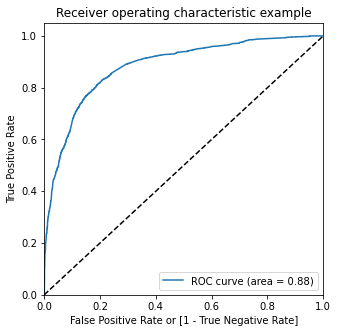

In [342]:
#Invoking the function to plot ROC - Curve. 

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

In [343]:
#Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.251854,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.230269,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.293546,3516,0,1,1,1,0,0,0,0,0,0,0
3,0,0.819239,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.227239,3934,0,1,1,1,0,0,0,0,0,0,0


In [344]:
#Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.559060  0.971614  0.304848
0.2   0.2  0.740878  0.914842  0.633683
0.3   0.3  0.802876  0.834955  0.783108
0.4   0.4  0.819109  0.770073  0.849325
0.5   0.5  0.817718  0.703569  0.888056
0.6   0.6  0.796691  0.593674  0.921789
0.7   0.7  0.782004  0.513788  0.947276
0.8   0.8  0.757112  0.409976  0.971014
0.9   0.9  0.712894  0.266018  0.988256


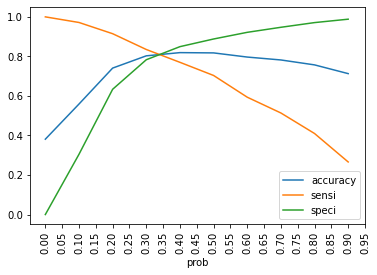

<Figure size 792x792 with 0 Axes>

In [345]:
#Let's plot accuracy sensitivity and specificity for various cutoff probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), rotation = 90)
plt.figure(figsize=(11,11))
plt.tight_layout()
plt.show()

### From the above curve we can see that the Intersection between Accuracy - Sensitivity and Specificity is at a cutoff probability of 0.35.

#### Hence 0.35 is the optimal cutoff probability.

In [346]:
# Calculation of predicted values on the score : 0.35

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Lead_Id,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.251854,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.230269,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.293546,3516,0,1,1,1,0,0,0,0,0,0,0,0
3,0,0.819239,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.227239,3934,0,1,1,1,0,0,0,0,0,0,0,0


#### Metrics calculation after choosing final probability cut off.

In [347]:
#Let's check the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8106060606060606

In [348]:
#Confusion matrix after probability cutoff : 0.35 

confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3269,  733],
       [ 492, 1974]], dtype=int64)

In [349]:
#Confusion Matrix - Calculating all parameters.

TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [350]:
#Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8004866180048662

In [351]:
#Let us calculate specificity
TN / float(TN+FP)

0.8168415792103948

In [352]:
#Calculate false postive rate - predicting conversion rate when customer will be a hot lead or not
print(FP/ float(TN+FP))

0.1831584207896052


In [353]:
#Positive predictive value 
print (TP / float(TP+FP))

0.7292205393424455


In [354]:
#Negative predictive value
print (TN / float(TN+ FN))

0.8691837277319862


In [355]:
# checking if 80% cases are correctly predicted based on the converted column.

# get the total of final predicted conversion / non conversion counts from the actual converted rates

checking_df = y_train_pred_final.loc[y_train_pred_final['Converted']==1,['Converted','final_predicted']]
checking_df['final_predicted'].value_counts()

1    1974
0     492
Name: final_predicted, dtype: int64

In [356]:
# check the precentage of final_predicted conversions i.e. sensitivity

1974/float(1974+492)

0.8004866180048662

#### ACCURACY - SPECIFICITY - SENSITIVITY

##### ACCURACY - 81.06%
##### SENSITIVITY - 80.05%
##### SPECIFICITY - 81.7%

### Precision and Recall

In [357]:
#Looking at the confusion matrix again (Train data set)

confusion2

array([[3269,  733],
       [ 492, 1974]], dtype=int64)

##### Precision
TP / TP + FP

In [358]:
confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])

0.7292205393424455

##### Recall
TP / TP + FN

In [359]:
confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])

0.8004866180048662

In [360]:
from sklearn.metrics import precision_score, recall_score

In [361]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_predicted)

0.7292205393424455

In [362]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8004866180048662

#### Precision and Recall Trade-off

In [363]:
# importing precision recall curve from sklearn library
from sklearn.metrics import precision_recall_curve

In [364]:
y_train_pred_final.Converted, y_train_pred_final.final_predicted

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Converted, Length: 6468, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       0
        ..
 6463    1
 6464    1
 6465    0
 6466    0
 6467    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [365]:
# Creating precision recall curve

p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

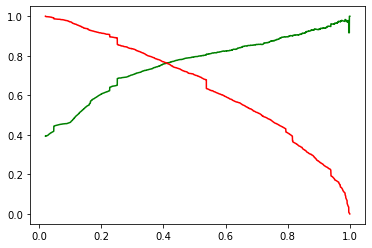

In [366]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [367]:
# Creating Lead Score variable for train dataset.

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Conversion_Prob','Lead_Id','final_predicted','Lead_Score']].head()

,Converted,Conversion_Prob,Lead_Id,final_predicted,Lead_Score
0,0,0.251854,1871,0,25
1,0,0.230269,6795,0,23
2,0,0.293546,3516,0,29
3,0,0.819239,8105,1,82
4,0,0.227239,3934,0,23


## Making predictions on the test set

In [368]:
num_cols

['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']

In [369]:
#Perform all the scaling on the available features.
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [370]:
#Selecting all the features, which are selected as per final model
#col has all the features available in the final model.

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified
4269,0,0.964504,0,0,0,0,0,0,0,0,0,0,0
2376,0,-0.885371,1,0,0,0,0,0,0,0,0,0,0
7766,0,-0.777416,0,0,0,0,0,0,0,1,0,0,0
9199,0,-0.885371,0,1,0,0,0,1,0,0,0,0,1
4359,0,-0.885371,1,0,0,0,0,0,0,0,0,1,0


### Building model on Test dataset 

In [371]:
# we will add a constant for X_Test.
X_test_sm = sm.add_constant(X_test)

In [372]:
y_test_pred = res.predict(X_test_sm)

In [373]:
# we will display all the predicted values
y_test_pred[:10]

4269    0.745782
2376    0.938439
7766    0.878698
9199    0.047589
4359    0.814856
9186    0.570475
1631    0.459563
8963    0.162227
8007    0.051683
5324    0.351163
dtype: float64

In [374]:
# we will convert y_pred to a dataframe which is an array
y_test_pred_1 = pd.DataFrame(y_test_pred)
y_test_pred_1.head()

,0
4269,0.745782
2376,0.938439
7766,0.878698
9199,0.047589
4359,0.814856


In [375]:
# We will convert y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [376]:
# Putting LeadID to index
y_test_df['Lead_Id'] = y_test_df.index

In [377]:
y_test_df.head()

,Converted,Lead_Id
4269,1,4269
2376,1,2376
7766,1,7766
9199,0,9199
4359,1,4359


In [378]:
# We will remove index for both dataframes so that we can append them side by side 
y_test_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [379]:
#we will append y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_test_pred_1],axis=1)

In [380]:
y_pred_final.head()

,Converted,Lead_Id,0
0,1,4269,0.745782
1,1,2376,0.938439
2,1,7766,0.878698
3,0,9199,0.047589
4,1,4359,0.814856


In [381]:
# we will rename the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Conversion_Prob'})

In [382]:
y_pred_final.head()

,Converted,Lead_Id,Conversion_Prob
0,1,4269,0.745782
1,1,2376,0.938439
2,1,7766,0.878698
3,0,9199,0.047589
4,1,4359,0.814856


In [383]:
# we will predict the test model on cut off probabilty (0.35)
y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [384]:
# we will display the predicted value dataframe.
y_pred_final.head()

,Converted,Lead_Id,Conversion_Prob,final_predicted
0,1,4269,0.745782,1
1,1,2376,0.938439,1
2,1,7766,0.878698,1
3,0,9199,0.047589,0
4,1,4359,0.814856,1


In [385]:
# we will check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8174603174603174

In [386]:
confusionTest= metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted)
confusionTest

array([[1387,  290],
       [ 216,  879]], dtype=int64)

In [387]:
TP = confusionTest[1,1] # true positive 
TN = confusionTest[0,0] # true negatives
FP = confusionTest[0,1] # false positives
FN = confusionTest[1,0] # false negatives

In [388]:
# we will see the sensitivity of our logistic regression model
sensitivity = round(TP / float(TP+FN),2) *100 
print(sensitivity)

80.0


In [389]:
# we will calculate specificity
TN / float(TN+FP)

0.827072152653548

#### ACCURACY - SPECIFICITY - SENSITIVITY

##### ACCURACY - 81.75%
##### SENSITIVITY - 80.0%
##### SPECIFICITY - 82.71%

### Precision and Recall metrics for the test set

In [390]:
precision_score(y_pred_final.Converted , y_pred_final.final_predicted)

0.7519247219846023

In [391]:
recall_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.8027397260273973

#### Sensitivity, Recall, and TPR must all be above 80% in order for the lead conversion rate to be high (greater than 80%, per the issue description).

##### We can lower the cut off by 0.01-0.02 to further boost sensitivity. The problem is that if we go any lower, specificity will also fall.

### OBSERVATION :

#### Performance metrics between train and test data do not differ significantly. This suggests that our final model is working well and did not overfit the training set.

#### We will assign Lead Score to all data points

In [403]:
# we will create Lead Score variable for train dataset.

y_train_pred_final['Lead_Score'] = y_train_pred_final.Conversion_Prob.map( lambda x: round(x*100,2))

y_train_pred_final[['Converted','Conversion_Prob','Lead_Id','final_predicted','Lead_Score']].head()

,Converted,Conversion_Prob,Lead_Id,final_predicted,Lead_Score
0,0,0.251854,1871,0,25.19
1,0,0.230269,6795,0,23.03
2,0,0.293546,3516,0,29.35
3,0,0.819239,8105,1,81.92
4,0,0.227239,3934,0,22.72


In [404]:
# we will create the Lead Score variable for test dataset.

y_pred_final['Lead_Score'] = y_pred_final.Conversion_Prob.map( lambda x: round(x*100,2))

y_pred_final[['Converted','Conversion_Prob','Lead_Id','final_predicted','Lead_Score']].head()

,Converted,Conversion_Prob,Lead_Id,final_predicted,Lead_Score
0,1,0.745782,4269,1,74.58
1,1,0.938439,2376,1,93.84
2,1,0.878698,7766,1,87.87
3,0,0.047589,9199,0,4.76
4,1,0.814856,4359,1,81.49


In [405]:
finalDf = pd.concat([y_pred_final[['Converted','Conversion_Prob','Lead_Id','final_predicted','Lead_Score']],y_train_pred_final[['Converted','Conversion_Prob','Lead_Id','final_predicted','Lead_Score']]],0)

In [406]:
finalDf.head()

,Converted,Conversion_Prob,Lead_Id,final_predicted,Lead_Score
0,1,0.745782,4269,1,74.58
1,1,0.938439,2376,1,93.84
2,1,0.878698,7766,1,87.87
3,0,0.047589,9199,0,4.76
4,1,0.814856,4359,1,81.49


In [407]:
# we will sort the values in order to find the top leads. 
ResultDf = finalDf.sort_values(by='Lead_Score', ascending=False)
ResultDf.head(10)

,Converted,Conversion_Prob,Lead_Id,final_predicted,Lead_Score
3115,1,0.999479,2656,1,99.95
546,1,0.999443,3478,1,99.94
1091,1,0.999385,818,1,99.94
4891,1,0.999400,8074,1,99.94
745,1,0.999412,6383,1,99.94
2888,1,0.999071,7219,1,99.91
6312,1,0.999103,3428,1,99.91
2405,1,0.998985,5921,1,99.90
6187,1,0.998927,7579,1,99.89
5672,1,0.998829,6751,1,99.88


In [409]:
FilteredResult = ResultDf.loc[ResultDf['Lead_Score'] >= 35]
print(ResultDf.shape)
print(FilteredResult.shape)

(9240, 5)
(3876, 5)


In [410]:
#We will check the Converted Rate
Converted_Rate_AfterModelling= (sum(FilteredResult['Converted'])/len(FilteredResult['Converted'].index))*100
Converted_Rate_AfterModelling

73.60681114551083

### CONCLUSION

#### Focusing on hot leads will improve the odds of gaining more value for the company because we will contact fewer people and have a higher conversion rate.


##### We can draw the following conclusions from our model:
1. The customer filling the form will be the potential leads.
2. The working class must be our main priority.
3. Focusing on clients who have invested a lot of time on our website is always a good idea.